## Log Analysis

### 1. Pick Up File

#### Step 1: Picking up the Log File
Load the log file for analysis. We'll use the `sample.log` file provided in the assignment.


In [1]:
# Import necessary libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import defaultdict

# File path
file_path = 'sample.log'


#### Step 2: Validate Log File
Ensure the log file contains essential elements like IP addresses, HTTP methods, and dates. We'll implement validation logic to confirm these are present.


In [ ]:
def validate_log_file(file_path):
    # Check for basic elements like IP addresses, methods, and dates
    with open(file_path, 'r') as file:
        for line in file:
            if not re.search(r'\d+\.\d+\.\d+\.\d+', line):  # Validate IP Address
                print(f"Invalid log format: Missing IP in line -> {line}")
                return False
            if not re.search(r'"(GET|POST|PUT|DELETE|OPTIONS|HEAD)', line):  # Validate Methods
                print(f"Invalid log format: Missing HTTP method in line -> {line}")
                return False
    print("Log file validation passed.")
    return True

# Validate the log file
if not validate_log_file(file_path):
    raise ValueError("Log file validation failed!")

Log file validation passed.


#### Step 3: Identify Log File Category
Determine the category of the log file based on its structure and contents, such as web server, Linux, or firewall logs.


In [ ]:
def identify_log_file_category(file_path):
    with open(file_path, 'r') as file:
        sample_line = file.readline()
        if 'HTTP' in sample_line:
            return 'Web Server Log'
        elif 'kernel' in sample_line:
            return 'Linux System Log'
        elif 'firewall' in sample_line:
            return 'Firewall Log'
    return 'Unknown Category'

log_category = identify_log_file_category(file_path)
print(f"Log file category identified as: {log_category}")


Log file category identified as: Web Server Log


#### Step 4: Construct Dictionary
Parse the log file and construct a dictionary to organize key information such as IP addresses, endpoints, and status codes.


In [ ]:
def parse_log_file(file_path):
    log_data = defaultdict(list)
    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(r'(?P<ip>\d+\.\d+\.\d+\.\d+).*\[(?P<date>[^\]]+)\] "(?P<method>GET|POST|PUT|DELETE|OPTIONS|HEAD) (?P<endpoint>\S+)', line)
            status_match = re.search(r'(?P<status>\d{3})', line)
            if match:
                log_data['IP Address'].append(match.group('ip'))
                log_data['Date'].append(match.group('date'))
                log_data['Method'].append(match.group('method'))
                log_data['Endpoint'].append(match.group('endpoint'))
                log_data['Status'].append(status_match.group('status') if status_match else None)
    return log_data

log_dict = parse_log_file(file_path)

#### Step 5: Write Dictionary to DataFrame
Convert the parsed log data dictionary into a Pandas DataFrame for easier analysis.


In [19]:
# Convert dictionary to DataFrame
log_df = pd.DataFrame(log_dict)
log_df['Date'] = pd.to_datetime(log_df['Date'], format='%d/%b/%Y:%H:%M:%S %z', errors='coerce')
log_df


,IP Address,Date,Method,Endpoint,Status
0,185.116.27.235,2024-12-05 15:46:56+00:00,POST,/login,185
1,49.64.179.123,2024-12-05 01:14:03+00:00,DELETE,/home,179
2,30.117.243.202,2024-12-05 03:17:35+00:00,POST,/user/profile,117
3,110.141.47.193,2024-12-05 16:53:46+00:00,PUT,/cart,110
4,19.235.99.159,2024-12-05 01:38:56+00:00,POST,/products,235
...,...,...,...,...,...
9995,52.206.243.4,2024-12-05 17:16:38+00:00,GET,/login,206
9996,127.144.209.194,2024-12-05 13:38:02+00:00,GET,/logout,127
9997,109.63.108.113,2024-12-05 14:57:51+00:00,DELETE,/login,109
9998,9.220.35.121,2024-12-04 19:50:26+00:00,DELETE,/products,220


#### Step 6: Perform Analysis
1. Count requests per IP address.
2. Identify the most frequently accessed endpoint.
3. Detect suspicious activities (e.g., repeated failed login attempts).


In [20]:
# Count requests per IP address
ip_counts = log_df['IP Address'].value_counts()

# Identify the most frequently accessed endpoint
endpoint_counts = log_df['Endpoint'].value_counts()
most_accessed_endpoint = endpoint_counts.idxmax()
most_accessed_count = endpoint_counts.max()

# Detect suspicious activities (e.g., failed login attempts)
failed_logins = log_df[log_df['Status'] == '401']
failed_login_counts = failed_logins['IP Address'].value_counts()
suspicious_ips = failed_login_counts[failed_login_counts > 10]


#### Step 7: Time Series Graph
Visualize request patterns over time using a time series graph.


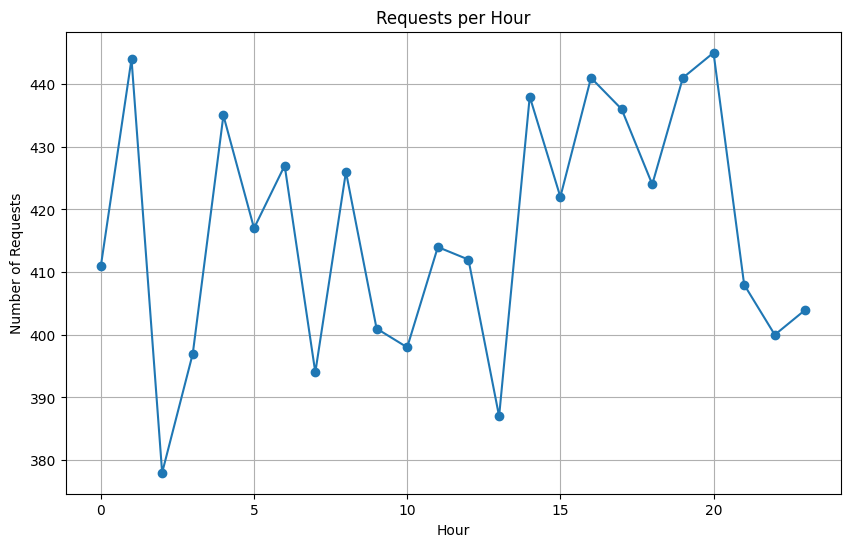

In [21]:
# Time series analysis: Requests per hour
log_df['Hour'] = log_df['Date'].dt.hour
hourly_requests = log_df.groupby('Hour').size()

# Plot the time series
plt.figure(figsize=(10, 6))
hourly_requests.plot(kind='line', title="Requests per Hour", marker='o')
plt.xlabel("Hour")
plt.ylabel("Number of Requests")
plt.grid(True)
plt.show()


#### Step 8: Output Results
Display results on-screen and save the analysis as a CSV file.



Requests per IP Address:
   IP Address   Request Count
  142.222.182.3   119
  69.223.199.206  119
  43.217.72.237   115
  247.213.22.9    115
  127.144.209.194 114
  66.101.161.12   114
  159.44.49.176   114
  147.72.90.192   113
  193.234.162.11  112
  240.65.167.196  112
  244.177.167.87  112
  9.220.35.121    111
  159.6.216.91    111
  207.72.124.233  111
  190.108.159.253 111
  97.81.57.148    111
  148.204.228.101 111
  40.54.250.28    111
  25.212.156.24   110
  91.33.89.51     110
  195.18.152.238  109
  30.120.200.194  109
  93.12.149.51    108
  114.214.114.160 108
  234.142.175.165 108
  150.60.97.102   106
  129.165.110.239 106
  56.209.36.4     106
  141.84.175.63   106
  206.40.220.230  106
  16.86.94.228    105
  32.55.127.115   104
  69.199.108.86   104
  215.69.220.95   104
  206.148.25.167  104
  225.74.5.96     104
  109.63.108.113  104
  157.219.182.99  103
  41.75.94.132    103
  30.117.243.202  103
  146.183.85.140  103
  67.219.162.152  102
  167.198.111.176 10